In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from bqplot import *
import ipywidgets
import xlrd

In [2]:
def startpoint(df,year):
    """
    :param df: penetration dataframe each year start row
    :param year: the year we want to know
    :return:the start point of each year
    >>> a= int(100)
    >>> b= int(2)
    >>> c=int(89)
    >>> d=int(3)
    >>> df = pd.DataFrame([(a,b,c,d),(b,a,c,d)],columns=["8","7","6","5"])
    >>> startpoint(df['5'],3)
    0
    """
    ia=[]
    for i in range(len(df)):
        if df[i]==year:
            ia.append(i)
    return ia[0]

def merge_result(clean_industry,clean_skill_needs,clean_skill,df_pen2015,df_pen2018):
    """

    :param clean_industry:cleaned industry migration dataset
    :param clean_skill_needs:cleaned industry needs skills dataset
    :param clean_skill:cleaned skill migration dataset
    :param df_pen2015:cleaned skill penetration 2015 dataset
    :param df_pen2018:cleaned skill penetration 2018 dataset
    :return:the result with these dataset
    >>> a= int(100)
    >>> b= int(2)
    >>> c=int(89)
    >>> d=int(3)
    >>> df1 = pd.DataFrame([(a,b,c,d),(b,a,c,d)],columns=["8","7","6","5"])
    >>> df2 = pd.DataFrame([(a,b,c),(b,a,c)],columns=["8","7","3"])
    >>> df3 = pd.DataFrame([(b,c,d),(a,c,d)],columns=["6","5","1"])
    >>> df4 = pd.DataFrame([(a,b,c,d,a,b),(b,a,c,d,b,c),(a,b,c,d,a,b)],columns=["9","8","7","6","5","4"])
    >>> df5 = pd.DataFrame([(a,b,c,d,a),(b,a,c,d,b),(a,b,c,d,a)],columns=["9","8","7","6","5"])
    >>> merge_result(df2,df1,df3,df4,df5)
    Empty DataFrame
    Columns: [3, 1, 9, 8, 7, 6, 5, 4]
    Index: []

    """
    result0 = pd.merge(clean_industry, clean_skill_needs).drop_duplicates()
    result1 = pd.merge(result0, clean_skill).drop_duplicates()
    result2 = pd.merge(df_pen2015, df_pen2018)
    result = pd.merge(result1, result2)
    return result

def final_merge_dataset(df,sgn,np5,np8):
    """

    :param df:merge_result function's result
    :param sgn:coloumn we need to type by ourselvies
    :param np5:coloumn we need to type by ourselvies
    :param np8:coloumn we need to type by ourselvies
    :return:final merge dataset with the whole world data
    >>> a= int(100)
    >>> b= int(2)
    >>> c=int(89)
    >>> d=int(3)
    >>> df = pd.DataFrame([(a,b,c,d),(b,a,c,d)],columns=["8","7","6","5"])
    >>> sgn='6'
    >>> np5='5'
    >>> np8='8'
    >>> final_merge_dataset(df,sgn,np5,np8)
          8    7   6    5
    0  50.0    2  89  1.5
    1   1.0  100  89  1.5
    """
    a=df.groupby([sgn])[np5].count()
    a1=a.tolist()
    b=a.index.values.tolist()
    x=[]
    for i in range(len(a1)):
        x.append([b[i],a1[i]])
    y5=[]
    y8=[]
    for m in range(len(df)):
        for j in x:
            if j[0]==df[sgn][m]:
                y5_ele=df[np5][m]/j[-1]
                y8_ele=df[np8][m]/j[-1]
                y5.append(y5_ele)
                y8.append(y8_ele)
    df.drop(columns=[np5])
    df.drop(columns=[np8])
    df[np5]=y5
    df[np8]=y8
    return df



In [3]:
def outlier(dataset):
    """
    :param dataset: list of number
    :return: lower bound and upper bound
    >>> a=[1,2,3,4]
    >>> outlier(a)
    (-0.5, 5.5)
    """
    dataset1=sorted(dataset)
    q1, q3= np.percentile(dataset1,[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr)
    upper_bound = q3 +(1.5 * iqr)
    return lower_bound,upper_bound

def changedf_tolist(result,n18,n15,p18,p15):
    """

    :param result:the final aggregated dataset
    :param n18:coloumn we need to type by ourselvies
    :param n15:coloumn we need to type by ourselvies
    :param p18:coloumn we need to type by ourselvies
    :param p15:coloumn we need to type by ourselvies
    :return:change dataframe to list
    >>> a= int(100)
    >>> b= int(2)
    >>> c=int(89)
    >>> d=int(3)
    >>> df = pd.DataFrame([(a,b,c,d),(b,a,c,d)],columns=["8","7","6","5"])
    >>> changedf_tolist(df,"8","7","6","5")
    ([86, 86], [0.0098, -0.0098], [0, 1])
    """
    attr=result.index.tolist()
    skill_diff=(result[n18]-result[n15]).tolist()
    skill_10k=[]
    for i in skill_diff:
        i=i/10000
        skill_10k.append(i)
    pen_diff=(result[p18]-result[p15]).tolist()
    return pen_diff,skill_10k,attr

def findoutlier(dataframe,pendiff,pen_lower,pen_upper,n8,n5,s8,s5):
    """

    :param dataframe:dataframe
    :param pendiff:penetration cleaned dataset
    :param pen_lower:penetration rate lower bound
    :param pen_upper:penetration rate upper bound
    :param n8:coloumn we need to type by ourselvies
    :param n5:coloumn we need to type by ourselvies
    :param s8:coloumn we need to type by ourselvies
    :param s5:coloumn we need to type by ourselvies
    :return:the outlier dataset
    >>> a= int(1)
    >>> b= int(2)
    >>> dif=[-2,3]
    >>> low=-1
    >>> up=1.5
    >>> df = pd.DataFrame([(a,b,a,b,b),(b,a,b,b,a)],columns=["2018","2017",'5','8','6'])
    >>> findoutlier(df,dif,low,up,"2018","2017",'5','8')
    (   2018  2017  5  8  6
    0     1     2  1  2  2,    2018  2017  5  8  6
    0     2     1  2  2  1, [-1], [-0.0001], [0], [0.0001])
    """
    value_list_less=[]
    value_list_more=[]
    for i in range(len(pendiff)):
        if pendiff[i]<=pen_lower:
            v=dataframe.iloc[i]
            value=v.tolist()
            value_list_less.append(value)
        if pendiff[i] >=pen_upper:
            v1=dataframe.iloc[i]
            value1=v1.tolist()
            value_list_more.append(value1)
    header=list(dataframe)
    lessdf=pd.DataFrame(value_list_less,columns = header)
    moredf=pd.DataFrame(value_list_more,columns = header)
    pen_diffless, ten_diffless, b = changedf_tolist(lessdf, n8,n5,s8,s5)

    pen_diffmore, ten_diffmore, c =changedf_tolist(moredf, n8,n5,s8,s5)

    return lessdf,moredf,pen_diffless,ten_diffless,pen_diffmore,ten_diffmore

def count_samesign(pendiff,tenkdiff):
    '''
    :param pendiff: list of penetration
    :param tenkdiff: list of 10k
    :return: with the same sign, with the different sign
    >>> a=[1,2,3,6]
    >>> b=[-1,3,-4,6]
    >>> count_samesign(a,b)
    (2, 2)
    '''
    cnt=0
    cnt1=0
    for i in range(len(pendiff)):
        if pendiff[i] >=0 and tenkdiff[i]>=0 or pendiff[i] <=0 and tenkdiff[i]<=0:
            cnt +=1
        else:
            cnt1 +=1
    return cnt,cnt1

In [4]:
def bar_graph(lable_1, lable_2, color_1, color_2, lable_1_name, lable_2_name, ylabel_name, title_name):
    """

    :param lable_1: A tuple contains data for the lable_1.
    :param lable_2: A tuple contains data for the lable_2.
    :param color_1: String, showing the color of the bar of lable_1.
    :param color_2: String, showing the color of the bar of lable_2 .
    :param lable_1_name: String, the name of lable_1.
    :param lable_2_name: String, the name of lable_2.
    :param ylabel_name: String, the name of y-axis.
    :param title_name: String, the name of x-axis.
    :return: A bar graph.
    >>> a = (0.23, 0.54, 0.47, 0.42, 0.36, 0.51)
    >>> b = (0.72, 0.30, 0.13, 0.34, 0.29, 0.26)
    >>> lable_1_name='test-a'
    >>> lable_2_name='test-b'
    >>> ylabel_name='Value'
    >>> title_name='Comparison of a and b'
    >>> color_1='b'
    >>> color_2='g'
    >>> bar_graph(a, b, color_1, color_2, lable_1_name, lable_2_name, ylabel_name, title_name)

    """

    n_groups = 6
    lable_net_or_em_1 = lable_1
    lable_net_or_em_2 = lable_2

    # fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.38
    opacity = 0.8

    rects1 = plt.bar(index, lable_net_or_em_1, bar_width,
                     alpha=opacity,
                     color=color_1,

                     label=lable_1_name)

    rects2 = plt.bar(index + bar_width, lable_net_or_em_2, bar_width,
                     alpha=opacity,
                     color=color_2,

                     label=lable_2_name)

    plt.xlabel('Industry Classification')

    plt.ylabel(ylabel_name)
    plt.title(title_name)

    plt.xticks(index + bar_width, ('AER', 'FIA', 'IC', 'M', 'MQ', 'PSTA'))
    plt.legend()

    plt.tight_layout()
    plt.show()

In [5]:
def line_chart(pendiff,tendiff,Attribute):
    """

    :param pendiff:penetration rate difference value
    :param tendiff:10k rate difference value
    :param Attribute:name of header
    :return:line chart
    >>> pd=[1,2,3]
    >>> td=[3,4,2]
    >>> at=['q','w','s']
    >>> line_chart(pd,td,at)

    """
    x=Attribute
    y1=pendiff
    y2=tendiff
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.plot(x, y1,linewidth = 1,marker='.',label='penetration')
    ax1.set_ylabel('Skill Penetration Difference')
    ax1.set_title("Trend between Penetration and 10k")
    plt.legend(loc="best")
    for ax1 in fig.axes:
        plt.sca(ax1)
        plt.xticks(rotation=45)
    ax2 = ax1.twinx()
    ax2.plot(x, y2, 'r',linewidth = 1,marker='.',label='10k')
    ax2.set_ylabel('Net 10k')
    plt.legend(loc="best")
    plt.show()

In [6]:
def pie_chart(countyes,countno):
    """

    :param countyes:same sign number
    :param countno:different sign number
    :return:pie chart
    >>> yes=10
    >>> no=2
    >>> pie_chart(yes,no)

    """
    labels = 'Same', 'Negative'
    sizes = [countyes,countno]
    explode = (0.1, 0)
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=False, startangle=90)
    ax1.axis('equal')
    plt.show()

In [7]:
def scatter_plot(outlier,ten_diff,sgn,inn):
    """
    :param outlier:outlier dataset
    :param ten_diff:10k rate difference value
    :param sgn:coloumn we need to type by ourselvies
    :param inn:coloumn we need to type by ourselvies
    :return:scatter plot
    >>> name1='col1'
    >>> name2='col2'
    >>> name3='col3'
    >>> d = {name1: ['1', '2'], name2: ['3', '4'],name3: ['6', '7']}
    >>> df = pd.DataFrame(data=d)
    >>> tf=[0.1,0.2]
    >>> scatter_plot(df,tf,'col1','col2')
    Figure(axes=[Axis(scale=OrdinalScale()), Axis(orientation='vertical', scale=LinearScale())], fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, layout=Layout(min_width='125px'), marks=[Scatter(colors=['steelblue'], interactions={'hover': 'tooltip'}, scales={'x': OrdinalScale(), 'y': LinearScale()}, scales_metadata={'x': {'orientation': 'horizontal', 'dimension': 'x'}, 'y': {'orientation': 'vertical', 'dimension': 'y'}, 'color': {'dimension': 'color'}, 'size': {'dimension': 'size'}, 'opacity': {'dimension': 'opacity'}, 'rotation': {'dimension': 'rotation'}, 'skew': {'dimension': 'skew'}}, tooltip=Tooltip(fields=['x', 'y'], labels=['classification', 'value']), tooltip_style={'opacity': 0.9}, x=array(['1|3', '2|4'], dtype='<U3'), y=array([0.1, 0.2]))], scale_x=LinearScale(allow_padding=False, max=1.0, min=0.0), scale_y=LinearScale(allow_padding=False, max=1.0, min=0.0))
    """
    x_sc = OrdinalScale()
    y_sc = LinearScale()
    a=outlier.groupby([sgn,inn]).count().index.tolist()
    b=[]
    for i in a:
        b.append('|'.join(list(i)))
    x1 = b
    y1 = ten_diff
    tooltips = Tooltip(fields=['x','y'], labels=['classification','value'])
    line_chart = Scatter(x=x1, y=y1, scales= {'x': x_sc, 'y': y_sc}, tooltip=tooltips)
    ax_x = Axis(scale=x_sc)
    ax_y = Axis(scale=y_sc, orientation='vertical')
    fig=Figure(marks=[line_chart], axes=[ax_x, ax_y])
    return fig

In [8]:
if __name__ == "__main__":
    # Read dataset
    industry_migration=pd.read_excel("/Users/tanya/Downloads/public_use-talent-migration.xlsx", sheet_name='Industry Migration')
    employment_growth = pd.read_excel("/Users/tanya/Downloads/public_use-industry-employment-growth.xlsx",sheet_name='Growth from Industry Transition')
    df_skill = pd.read_excel("/Users/tanya/Downloads/public_use-talent-migration.xlsx", sheet_name='Skill Migration')
    df_penetration = pd.read_excel("/Users/tanya/Downloads/public_use-skill-penetration.xlsx",sheet_name='Skill Penetration')
    df_indskill = pd.read_excel("/Users/tanya/Downloads/public_use-industry-skills-needs.xlsx",sheet_name='Industry Skills Needs') 

In [9]:
# part1
industry_migration1 = industry_migration[["country_name","isic_section_name","industry_name","net_per_10K_2015","net_per_10K_2018"]]
industry_migration = industry_migration1.loc[industry_migration['country_name'].isin(['United States','China'])]
employment_growth = employment_growth[["country_name","isic_section_name", "industry_name","growth_rate_2015","growth_rate_2018"]]
employment_growth = employment_growth.loc[employment_growth['country_name'].isin(['United States','China'])]
result_df = pd.merge(industry_migration, employment_growth, on=['country_name','isic_section_name','industry_name'],how = 'right')

result_df = result_df[pd.notnull(result_df['net_per_10K_2015'])]
result_df = result_df[pd.notnull(result_df['net_per_10K_2018'])]

result_df = result_df[pd.notnull(result_df['growth_rate_2015'])]
result_df = result_df[pd.notnull(result_df['growth_rate_2018'])]

result_df.columns = ['country_name', 'industry_classification','industry_name','net_migration_2015','net_migration_2018','employment_growth_rate_2015','employment_growth_rate_2018']


result_df['net_migration_2015'] /= 10000
result_df['net_migration_2018'] /= 10000

industry_name = result_df[["industry_classification","industry_name","country_name"]]

industry_name = industry_name.loc[industry_name['country_name'] == 'China']

industry_name = industry_name[["industry_name", "industry_classification"]]


industry_name = industry_name.groupby(['industry_classification'])

for name,group in industry_name:
   print()
   print(name)
   print()
   print(group['industry_name'])


Arts, entertainment and recreation 

12                 Entertainment
13                        Sports
16                      Fine Art
48                 Arts & Crafts
51                         Music
56    Health, Wellness & Fitness
Name: industry_name, dtype: object

Financial and insurance activities

17                             Banking
18                           Insurance
19                  Financial Services
20                  Investment Banking
21               Investment Management
44    Venture Capital & Private Equity
58                     Capital Markets
Name: industry_name, dtype: object

Information and communication

0                     Computer Hardware
1                     Computer Software
2                   Computer Networking
3                              Internet
4                        Semiconductors
5                    Telecommunications
14               Motion Pictures & Film
15                      Broadcast Media
35                           New

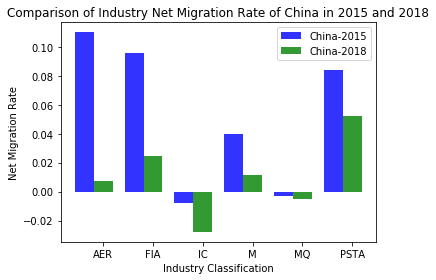

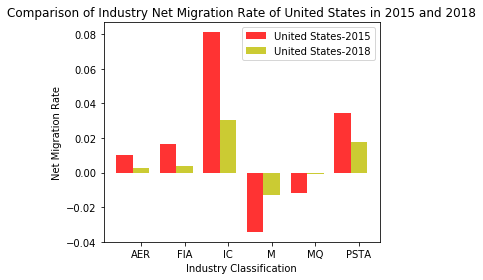

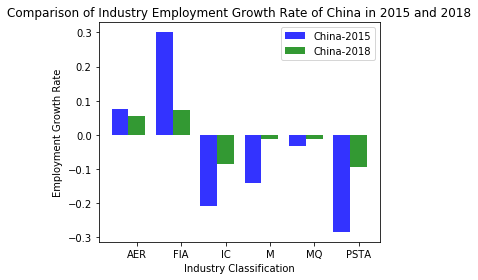

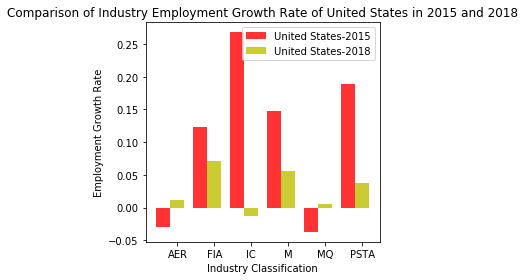

In [10]:
result_df=result_df.groupby(['country_name','industry_classification'])[['net_migration_2015','net_migration_2018','employment_growth_rate_2015','employment_growth_rate_2018']].sum()

China_net_2015=tuple(result_df.groupby('country_name').get_group('China')['net_migration_2015'].tolist())
China_net_2018=tuple(result_df.groupby('country_name').get_group('China')['net_migration_2018'].tolist())

US_net_2015=tuple(result_df.groupby('country_name').get_group('United States')['net_migration_2015'].tolist())
US_net_2018=tuple(result_df.groupby('country_name').get_group('United States')['net_migration_2018'].tolist())

China_em_2015=tuple(result_df.groupby('country_name').get_group('China')['employment_growth_rate_2015'].tolist())
China_em_2018=tuple(result_df.groupby('country_name').get_group('China')['employment_growth_rate_2018'].tolist())

US_em_2015=tuple(result_df.groupby('country_name').get_group('United States')['employment_growth_rate_2015'].tolist())
US_em_2018=tuple(result_df.groupby('country_name').get_group('United States')['employment_growth_rate_2018'].tolist())

bar_graph(China_net_2015, China_net_2018, 'b', 'g', 'China-2015','China-2018', 'Net Migration Rate','Comparison of Industry Net Migration Rate of China in 2015 and 2018')

bar_graph(US_net_2015, US_net_2018, 'r', 'y', 'United States-2015','United States-2018', 'Net Migration Rate','Comparison of Industry Net Migration Rate of United States in 2015 and 2018')

bar_graph(China_em_2015, China_em_2018, 'b', 'g', 'China-2015','China-2018', 'Employment Growth Rate','Comparison of Industry Employment Growth Rate of China in 2015 and 2018')

bar_graph(US_em_2015, US_em_2018, 'r', 'y', 'United States-2015','United States-2018', 'Employment Growth Rate','Comparison of Industry Employment Growth Rate of United States in 2015 and 2018')



In [11]:
# part2

clean_skill_needs = df_indskill[
    ['isic_section_name', 'industry_name', 'skill_group_category', 'skill_group_name']].drop_duplicates()
clean_industry = industry_migration1[["isic_section_name", "industry_name"]].drop_duplicates()
clean_skill = df_skill[
    ['skill_group_category', 'skill_group_name', 'net_per_10K_2015', 'net_per_10K_2018']].groupby(
    ['skill_group_category', 'skill_group_name']).sum().reset_index()

df_pen2015 = df_penetration.drop(columns=['year','isic_section_index']).iloc[:startpoint(df_penetration['year'],2016)].rename(
    columns={'skill_group_penetration_rate': 'skill_group_penetration_rate_2015'})
df_pen2018 = df_penetration.drop(columns=['year','isic_section_index']).iloc[startpoint(df_penetration['year'],2018):].rename(
    columns={'skill_group_penetration_rate': 'skill_group_penetration_rate_2018'})

result=final_merge_dataset(merge_result(clean_industry,clean_skill_needs,clean_skill,df_pen2015,df_pen2018),'skill_group_name', 'net_per_10K_2015', 'net_per_10K_2018')


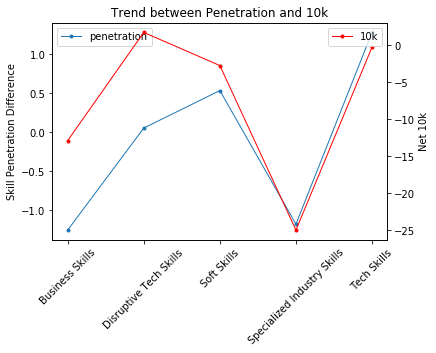

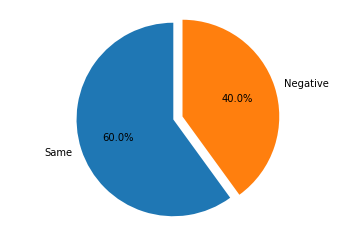

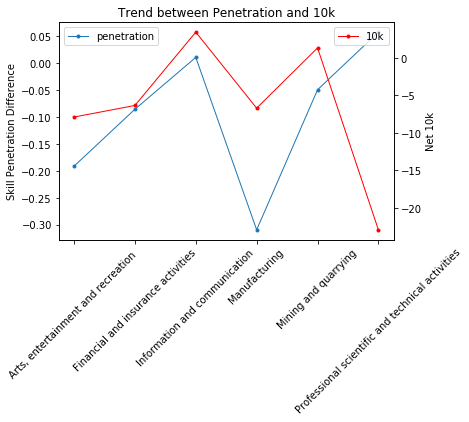

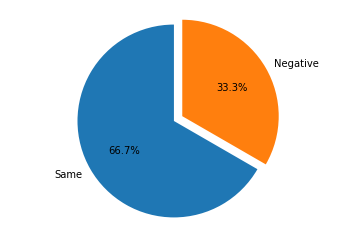

In [12]:
# skill_result = result.groupby(['skill_group_category']).sum()
# industry_result = result.groupby('isic_section_name').sum()

pendiff, tendiff, skillAttribute = changedf_tolist(result.groupby(['skill_group_category']).sum(), 'net_per_10K_2018', 'net_per_10K_2015',
                                                 'skill_group_penetration_rate_2018',
                                                 'skill_group_penetration_rate_2015')
pendiffin, tendiffin, industryAttribute = changedf_tolist(result.groupby('isic_section_name').sum(), 'net_per_10K_2018', 'net_per_10K_2015',
                                                        'skill_group_penetration_rate_2018',
                                                        'skill_group_penetration_rate_2015')

countskillyes, countskillno = count_samesign(pendiff, tendiff)
countindyes, countindno = count_samesign(pendiffin, tendiffin)

pen_diff, ten_diff, a = changedf_tolist(result, 'net_per_10K_2018', 'net_per_10K_2015',
                                      'skill_group_penetration_rate_2018', 'skill_group_penetration_rate_2015')

penlower, penupper = outlier(pen_diff)
tenlower, tenupper = outlier(ten_diff)

outlierless,outliermore,pen_diffless, ten_diffless,pen_diffmore, ten_diffmore = findoutlier(result, pen_diff, penlower, penupper,'net_per_10K_2018', 'net_per_10K_2015',
                                              'skill_group_penetration_rate_2018',
                                              'skill_group_penetration_rate_2015')

line_chart(pendiff, tendiff, skillAttribute)
pie_chart(countskillyes, countskillno)

line_chart(pendiffin, tendiffin, industryAttribute)
pie_chart(countindyes, countindno)

In [13]:
scatter_plot(outlierless, ten_diffless, 'skill_group_name', 'industry_name')

Figure(axes=[Axis(scale=OrdinalScale()), Axis(orientation='vertical', scale=LinearScale())], fig_margin={'top'…

In [14]:
scatter_plot(outliermore, ten_diffmore, 'skill_group_name', 'industry_name')

Figure(axes=[Axis(scale=OrdinalScale()), Axis(orientation='vertical', scale=LinearScale())], fig_margin={'top'…